In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data/news_share_model_ready.csv')
test_df = pd.read_csv('data/news_test_data.csv')
print(df.shape)
print(test_df.shape)
df.head()




(999, 57)
(999, 57)


,cleaned_title,cleaned_text,weekday,is_weekend,month,cleaned_data_channel,Channel_Entertainment,Channel_Lifestyle,Channel_Others,Channel_Social Media,Channel_Tech,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,month no,weekday no,avg shares daily,avg shares weekly,avg shares by channel,title_tokens,text_tokens,noun_count_title,verb_count_title,adjective_count_title,noun_count_text,verb_count_text,adjective_count_text,amazon fire,april fools,fire tv,game thrones,google glass,need know,report says,2014opens new,april 2014opens,fire tv.1,new window,new york,see also,social media,title_readability,text_readability
0,time youtube competitor,reported last week yahoo getting online video ...,Monday,0,March,Business,0,0,0,0,0,0.640816,5,3,1.0,4.579592,5,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,3,3,2441.637795,2316.046429,2312.036810,3,102,2,0,0,49,28,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59.97,-40.52
1,ultimate roundup 2014s biggest april fools day...,april fools marks day pranking goes corporate ...,Tuesday,0,April,Tech,0,0,0,0,1,0.549618,4,1,0.0,4.636704,7,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,4,4,2233.879630,2316.046429,2676.025510,8,54,5,0,2,20,16,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,80.28,8.21
2,selfie one garish jacket red sox white house,2013 world series champion boston red sox visi...,Tuesday,0,April,Tech,0,0,0,0,1,0.577236,8,1,0.0,4.627451,7,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,4,4,2233.879630,2316.046429,2676.025510,8,239,3,1,3,103,56,53,0,0,0,0,0,0,0,5,5,0,17,0,0,0,80.28,-179.58
3,african telecom proposes diverse emoticons,less week apple pledged make emoticons raciall...,Tuesday,0,April,Tech,0,0,0,0,1,0.525896,4,1,0.0,5.083665,9,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300,4,4,2233.879630,2316.046429,2676.025510,5,141,2,1,2,67,42,26,0,0,0,0,0,0,0,0,0,0,2,0,1,0,32.56,-80.11
4,google launch improved android camera app repo...,android users may soon see series new features...,Tuesday,0,April,Others,0,0,1,0,0,0.588889,6,9,0.0,4.336022,7,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000,4,4,2233.879630,2316.046429,2208.388571,8,148,5,2,1,62,49,31,0,0,0,0,0,0,1,0,0,0,1,0,0,0,71.82,-95.67


In [ ]:
test_df.head()

,cleaned_title,cleaned_text,weekday,is_weekend,month,cleaned_data_channel,Channel_Entertainment,Channel_Lifestyle,Channel_Others,Channel_Social Media,Channel_Tech,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,month no,weekday no,avg shares daily,avg shares weekly,avg shares by channel,title_tokens,text_tokens,noun_count_title,verb_count_title,adjective_count_title,noun_count_text,verb_count_text,adjective_count_text,amazon fire,april fools,fire tv,game thrones,google glass,need know,report says,2014opens new,april 2014opens,fire tv.1,new window,new york,see also,social media,title_readability,text_readability
0,time youtube competitor,reported last week yahoo getting online video ...,Monday,0,March,Business,0,0,0,0,0,0.640816,5,3,1.0,4.579592,5,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,3,3,2441.637795,2316.046429,2312.036810,3,102,2,0,0,49,28,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59.97,-40.52
1,ultimate roundup 2014s biggest april fools day...,april fools marks day pranking goes corporate ...,Tuesday,0,April,Tech,0,0,0,0,1,0.549618,4,1,0.0,4.636704,7,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,4,4,2233.879630,2316.046429,2676.025510,8,54,5,0,2,20,16,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,80.28,8.21
2,selfie one garish jacket red sox white house,2013 world series champion boston red sox visi...,Tuesday,0,April,Tech,0,0,0,0,1,0.577236,8,1,0.0,4.627451,7,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,4,4,2233.879630,2316.046429,2676.025510,8,239,3,1,3,103,56,53,0,0,0,0,0,0,0,5,5,0,17,0,0,0,80.28,-179.58
3,african telecom proposes diverse emoticons,less week apple pledged make emoticons raciall...,Tuesday,0,April,Tech,0,0,0,0,1,0.525896,4,1,0.0,5.083665,9,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300,4,4,2233.879630,2316.046429,2676.025510,5,141,2,1,2,67,42,26,0,0,0,0,0,0,0,0,0,0,2,0,1,0,32.56,-80.11
4,google launch improved android camera app repo...,android users may soon see series new features...,Tuesday,0,April,Others,0,0,1,0,0,0.588889,6,9,0.0,4.336022,7,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000,4,4,2233.879630,2316.046429,2208.388571,8,148,5,2,1,62,49,31,0,0,0,0,0,0,1,0,0,0,1,0,0,0,71.82,-95.67


In [ ]:
df.columns

Index(['cleaned_title', 'cleaned_text', 'weekday', 'is_weekend', 'month',
       'cleaned_data_channel', 'Channel_Entertainment', 'Channel_Lifestyle',
       'Channel_Others', 'Channel_Social Media', 'Channel_Tech',
       'unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'min_avg_key', 'max_avg_key',
       'avg_avg_key', 'href_avg_shares', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'shares', 'month no', 'weekday no',
       'avg shares daily', 'avg shares weekly', 'avg shares by channel',
       'title_tokens', 'text_tokens', 'noun_count_title', 'verb_count_title',
       'adjective_count_title', 'noun_count_text', 'verb_count_text',
       'adjective_count_text', 'amazon fire', 'april fools', 'fire tv',
       'game thrones', 'google glass', 'need know', 'report says',
       '2014opens n

In [ ]:
test_df.columns

Index(['cleaned_title', 'cleaned_text', 'weekday', 'is_weekend', 'month',
       'cleaned_data_channel', 'Channel_Entertainment', 'Channel_Lifestyle',
       'Channel_Others', 'Channel_Social Media', 'Channel_Tech',
       'unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'min_avg_key', 'max_avg_key',
       'avg_avg_key', 'href_avg_shares', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'shares', 'month no', 'weekday no',
       'avg shares daily', 'avg shares weekly', 'avg shares by channel',
       'title_tokens', 'text_tokens', 'noun_count_title', 'verb_count_title',
       'adjective_count_title', 'noun_count_text', 'verb_count_text',
       'adjective_count_text', 'amazon fire', 'april fools', 'fire tv',
       'game thrones', 'google glass', 'need know', 'report says',
       '2014opens n

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cleaned_title               999 non-null    object 
 1   cleaned_text                999 non-null    object 
 2   weekday                     999 non-null    object 
 3   is_weekend                  999 non-null    int64  
 4   month                       999 non-null    object 
 5   cleaned_data_channel        999 non-null    object 
 6   Channel_Entertainment       999 non-null    int64  
 7   Channel_Lifestyle           999 non-null    int64  
 8   Channel_Others              999 non-null    int64  
 9   Channel_Social Media        999 non-null    int64  
 10  Channel_Tech                999 non-null    int64  
 11  unique_tokens_rate          999 non-null    float64
 12  num_hrefs                   999 non-null    int64  
 13  num_imgs                    999 non

In [ ]:
num_df = df.drop(columns = ['cleaned_title', 'cleaned_text', 'weekday','month',
       'cleaned_data_channel',])
test_df = test_df.drop(columns = ['cleaned_title', 'cleaned_text', 'weekday','month',
       'cleaned_data_channel',])
num_df.shape
test_df.shape

(999, 52)

In [ ]:
cols_to_treat = num_df.drop(columns = ['month no', 'weekday no','is_weekend', 'Channel_Entertainment', 'Channel_Lifestyle',
       'Channel_Others', 'Channel_Social Media', 'Channel_Tech'])

In [ ]:
cols_to_treat.shape

(999, 44)

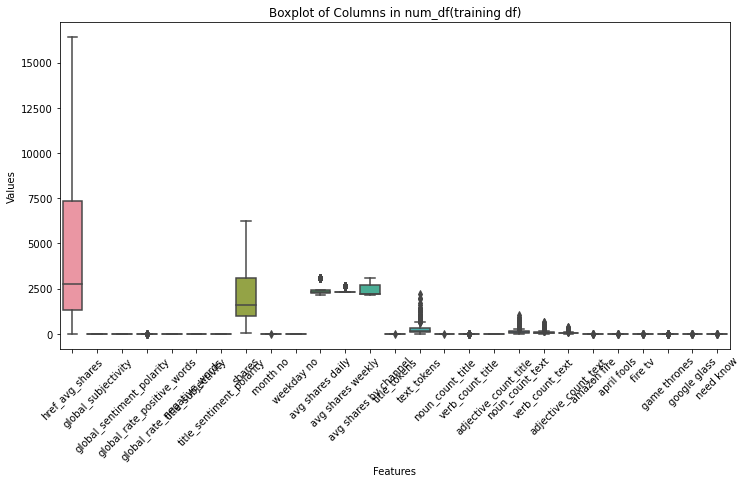

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot( data = num_df.iloc[:,15:42])

plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in num_df(training df)')
plt.show()

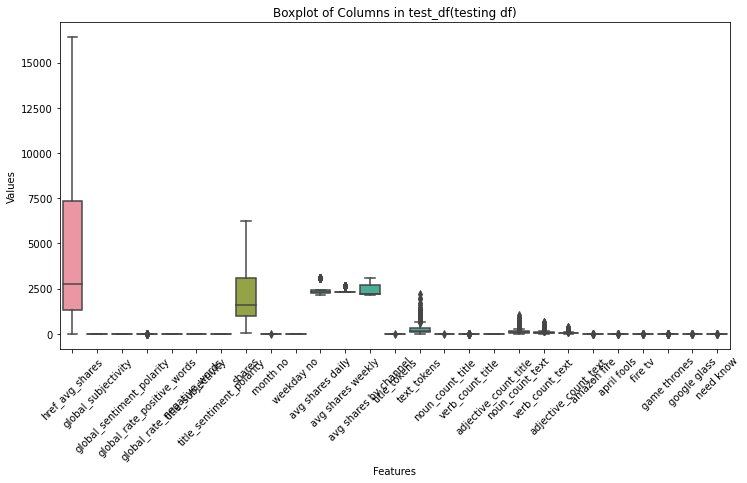

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot( data = test_df.iloc[:,15:42])

plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in test_df(testing df)')
plt.show()

In [ ]:
print("\nDistribution (BEFORE outlier treatment):")
cols_to_treat.describe()


Distribution (BEFORE outlier treatment):


,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,avg shares daily,avg shares weekly,avg shares by channel,title_tokens,text_tokens,noun_count_title,verb_count_title,adjective_count_title,noun_count_text,verb_count_text,adjective_count_text,amazon fire,april fools,fire tv,game thrones,google glass,need know,report says,2014opens new,april 2014opens,fire tv.1,new window,new york,see also,social media,title_readability,text_readability
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.532183,10.158158,4.260260,0.547548,4.675496,7.207207,1132.205907,5499.373117,3256.800153,4976.071248,0.450364,0.106496,0.037962,0.017433,0.293408,0.056851,2366.762763,2366.762763,2366.762763,2366.762763,6.740741,254.267267,3.743744,1.349349,1.146146,117.890891,69.647648,49.148148,0.007007,0.007007,0.010010,0.023023,0.010010,0.008008,0.007007,0.378378,0.180180,0.124124,3.885886,0.214214,0.150150,0.154154,60.316406,-202.034094
std,0.099346,7.654816,5.105337,0.807028,0.284113,1.859846,1181.656104,2231.951378,1047.739362,5258.348719,0.091591,0.087908,0.014989,0.009358,0.325482,0.170974,1812.447026,264.987744,116.628962,261.216199,1.612157,241.106151,1.330390,0.961731,0.929727,112.130833,69.618758,46.443774,0.083456,0.083456,0.099598,0.150052,0.099598,0.089173,0.083456,1.718394,0.838435,2.072486,6.577958,0.677552,0.365712,0.754585,26.597296,246.383643
min,0.272165,0.000000,0.000000,0.000000,3.942951,2.000000,0.000000,3568.870000,1360.101000,0.000000,0.224646,-0.114407,0.001300,0.000000,0.000000,-0.225000,58.000000,2157.572687,2316.046429,2139.983784,2.000000,14.000000,0.000000,0.000000,0.000000,5.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-50.020000,-2213.300000
25%,0.466835,4.000000,1.000000,0.000000,4.490862,6.000000,0.000000,3613.040000,2534.726000,1300.000000,0.395563,0.051911,0.028655,0.011224,0.000000,0.000000,1000.000000,2233.879630,2316.046429,2208.388571,6.000000,106.500000,3.000000,1.000000,0.000000,49.000000,28.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,46.440000,-272.620000
50%,0.533149,8.000000,2.000000,0.000000,4.685668,7.000000,984.066700,4635.807000,3004.755000,2766.667000,0.455990,0.102511,0.037325,0.016340,0.200000,0.000000,1600.000000,2284.658768,2316.046429,2208.388571,7.000000,176.000000,4.000000,1.000000,1.000000,82.000000,48.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,62.340000,-124.770000
75%,0.596615,14.000000,7.000000,1.000000,4.856136,9.000000,2116.714500,6561.910000,3809.005000,7341.000000,0.509508,0.162790,0.046892,0.022606,0.500000,0.150000,3100.000000,2441.637795,2316.046429,2676.025510,8.000000,320.500000,5.000000,2.000000,2.000000,146.000000,86.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,80.280000,-50.845000
max,0.791285,29.000000,16.000000,2.500000,5.404047,10.000000,3613.040000,10985.215000,5720.423500,16402.500000,0.680424,0.329107,0.074246,0.039680,1.000000,0.375000,6250.000000,3088.297872,2634.698113,3106.109091,11.000000,2226.000000,9.000000,5.00

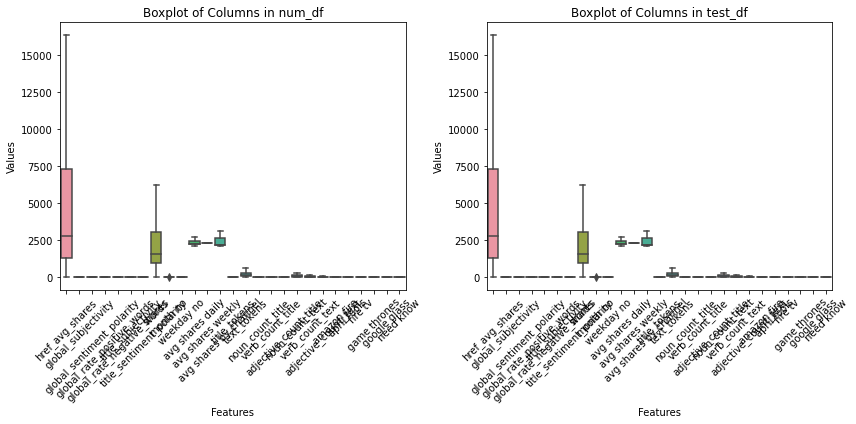

In [ ]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(data=num_df_treated.iloc[:, 15:42])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in num_df')


plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(data=test_df_treated.iloc[:, 15:42])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in test_df')


plt.tight_layout()
plt.show()

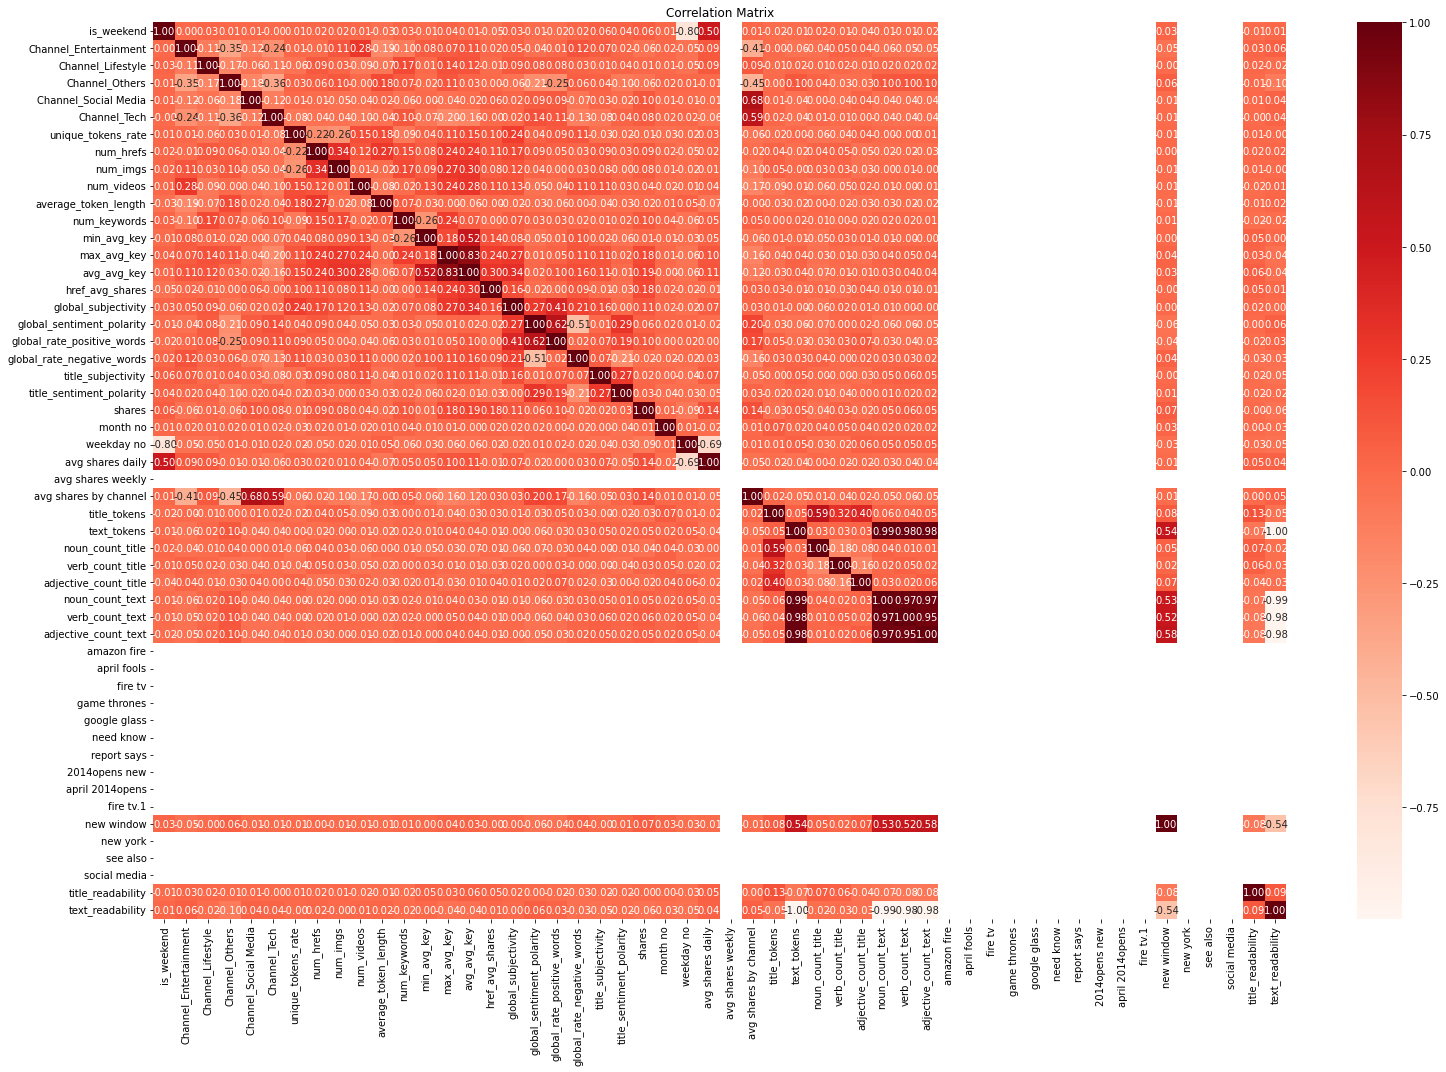

In [ ]:
correlation_matrix = test_df_treated.corr()
plt.figure(figsize=(22, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:

corr_with_target = correlation_matrix['shares'].sort_values(ascending=False)

top_correlated_features = corr_with_target[1:25]
print(top_correlated_features)


avg_avg_key                   0.190891
href_avg_shares               0.180088
max_avg_key                   0.175701
avg shares by channel         0.144123
avg shares daily              0.142761
global_subjectivity           0.105557
num_keywords                  0.102101
global_rate_positive_words    0.099742
Channel_Social Media          0.098513
num_hrefs                     0.091711
Channel_Tech                  0.084343
num_imgs                      0.075050
new window                    0.066507
is_weekend                    0.064349
verb_count_text               0.063733
global_sentiment_polarity     0.055804
text_tokens                   0.054196
adjective_count_text          0.051020
noun_count_text               0.050920
num_videos                    0.038335
verb_count_title              0.032987
title_sentiment_polarity      0.031976
title_subjectivity            0.021661
month no                      0.013398
Name: shares, dtype: float64


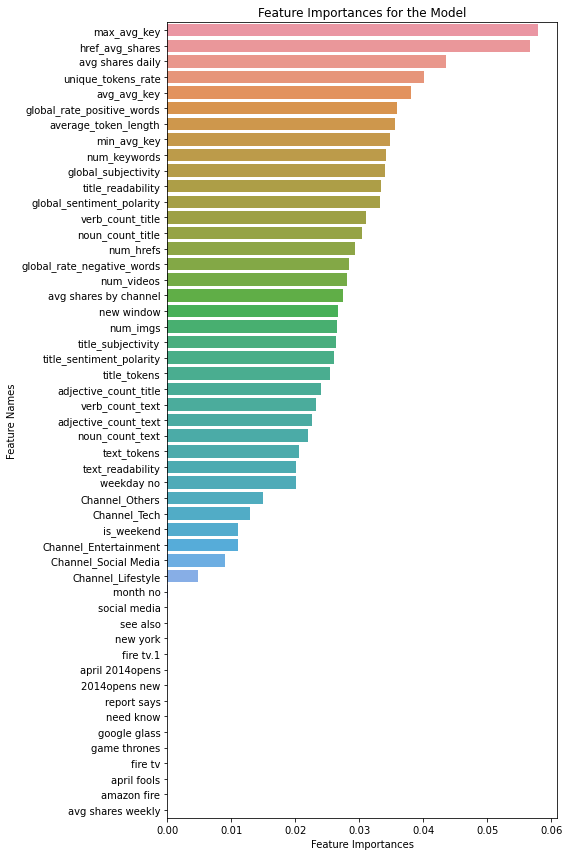

In [ ]:

sorted_feature_importances = pd.DataFrame({'Feature Importance': feature_importances, 'Feature Names': feature_names})

# Sort the DataFrame based on feature importances in descending order
sorted_feature_importances = sorted_feature_importances.sort_values(by='Feature Importance', ascending=False)



plt.figure(figsize=(8, 12))
sns.barplot(data=sorted_feature_importances, x='Feature Importance', y='Feature Names', )
plt.xlabel('Feature Importances')
plt.ylabel('Feature Names')
plt.title('Feature Importances for the Model')


plt.tight_layout()
plt.show()

In [ ]:
sorted_feature_importances['Feature Names'].tolist()

['max_avg_key',
 'href_avg_shares',
 'avg shares daily',
 'unique_tokens_rate',
 'avg_avg_key',
 'global_rate_positive_words',
 'average_token_length',
 'min_avg_key',
 'num_keywords',
 'global_subjectivity',
 'title_readability',
 'global_sentiment_polarity',
 'verb_count_title',
 'noun_count_title',
 'num_hrefs',
 'global_rate_negative_words',
 'num_videos',
 'avg shares by channel',
 'new window',
 'num_imgs',
 'title_subjectivity',
 'title_sentiment_polarity',
 'title_tokens',
 'adjective_count_title',
 'verb_count_text',
 'adjective_count_text',
 'noun_count_text',
 'text_tokens',
 'text_readability',
 'weekday no',
 'Channel_Others',
 'Channel_Tech',
 'is_weekend',
 'Channel_Entertainment',
 'Channel_Social Media',
 'Channel_Lifestyle',
 'month no',
 'social media',
 'see also',
 'new york',
 'fire tv.1',
 'april 2014opens',
 '2014opens new',
 'report says',
 'need know',
 'google glass',
 'game thrones',
 'fire tv',
 'april fools',
 'amazon fire',
 'avg shares weekly']

In [ ]:
selected_cols = ['max_avg_key',
 'href_avg_shares',
 'avg shares daily',
 'unique_tokens_rate',
 'global_rate_positive_words',
 'min_avg_key',
 'avg_avg_key',
 'num_keywords',
 'global_sentiment_polarity',
 'verb_count_title',
 'average_token_length',
 'global_subjectivity',
 'title_readability',
 'global_rate_negative_words',
 'num_videos',
 'noun_count_title',
 'num_hrefs',
 'num_imgs',
 'shares']
selected_df = num_df_treated[selected_cols]
selected_df.head(2)

,max_avg_key,href_avg_shares,avg shares daily,unique_tokens_rate,global_rate_positive_words,min_avg_key,avg_avg_key,num_keywords,global_sentiment_polarity,verb_count_title,average_token_length,global_subjectivity,title_readability,global_rate_negative_words,num_videos,noun_count_title,num_hrefs,num_imgs,shares
0,4817.692,1833.333,2441.637795,0.640816,0.036735,1459.5,3370.415,5,0.038762,0.0,4.579592,0.403762,59.97,0.024490,1.0,2,5,3,1600
1,3581.094,8500.000,2233.879630,0.549618,0.044944,0.0,2556.367,7,0.180934,0.0,4.636704,0.410707,80.28,0.003745,0.0,5,4,1,1500


- **Setting up the X and y variable for all models to train**

In [ ]:
X = selected_df.drop(columns=['shares'])  # Features (excluding 'shares')
y = selected_df[['shares']]  # Target variable
#Creation phase..
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=1234)

print(X.shape)
print(y.shape)

print((X_train.shape,X_test.shape), (y_train.shape,y_test.shape))

(999, 18)
(999, 1)
((699, 18), (300, 18)) ((699, 1), (300, 1))


### Removing outliers

In [ ]:
import pandas as pd
cols2treat = ['max_avg_key',
 'href_avg_shares',
 'avg shares daily',
 'unique_tokens_rate',
 'global_rate_positive_words',
 'min_avg_key',
 'avg_avg_key',
 'num_keywords',
 'global_sentiment_polarity',
 'verb_count_title',
 'average_token_length',
 'global_subjectivity',
 'title_readability',
 'global_rate_negative_words',
 'num_videos',
 'noun_count_title',
 'num_hrefs',
 'num_imgs',]
def treat_outliers_iqr(data, cols_to_treat):
    data_copy = data.copy()

    for col in cols_to_treat:
        q1 = data_copy[col].quantile(0.25)
        q3 = data_copy[col].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        data_copy[col] = data_copy[col].clip(lower=lower_bound, upper=upper_bound)

    return data_copy

# Treat outliers for X_train
X_train = treat_outliers_iqr(X_train, cols2treat)

# Treat outliers for X_test
X_test = treat_outliers_iqr(X_test, cols2treat)



In [ ]:
targetcol = ['shares']

In [ ]:
def treat_outliers_iqr(data, cols_to_treat):
    data_copy = data.copy()

    for col in cols_to_treat:
        q1 = data_copy[col].quantile(0.25)
        q3 = data_copy[col].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        data_copy[col] = data_copy[col].clip(lower=lower_bound, upper=upper_bound)

    return data_copy

# Treat outliers for X_train
y_train = treat_outliers_iqr(y_train, targetcol)

# Treat outliers for X_test
y_test = treat_outliers_iqr(y_test, targetcol)

**`Feature Scaling after splittting to remove Data Leakage`**

In [ ]:
from sklearn.preprocessing import MinMaxScaler


scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()


X_train = scaler_X.fit_transform(X_train)
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))


X_test = scaler_X.transform(X_test)
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))


In [ ]:
X_train

array([[0.04453784, 0.16460905, 0.21333822, ..., 0.375     , 0.29090909,
        0.125     ],
       [0.04659263, 0.04517604, 0.21333822, ..., 0.75      , 0.07272727,
        0.0625    ],
       [0.06247147, 0.04865112, 0.21333822, ..., 0.875     , 0.03636364,
        0.0625    ],
       ...,
       [0.20336513, 0.14631916, 1.        , ..., 0.625     , 0.65454545,
        0.5625    ],
       [0.00416823, 1.        , 1.        , ..., 0.5       , 0.36363636,
        0.0625    ],
       [0.00550783, 0.23776863, 0.12809575, ..., 0.25      , 0.03636364,
        0.1875    ]])

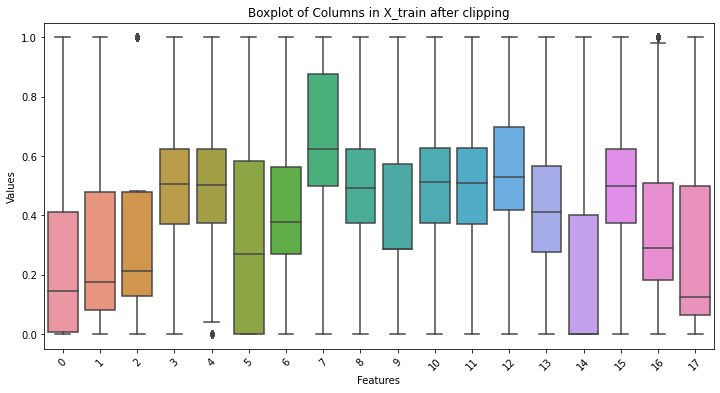

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot( data = X_train)

plt.xticks(rotation=45)
plt.xlabel('Features')

plt.ylabel('Values')
plt.title('Boxplot of Columns in X_train after clipping')
plt.show()

In [ ]:
'''plt.figure(figsize=(12, 6))
sns.boxplot( data = X_train)

plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in X_test before clipping')
plt.show()'''

"plt.figure(figsize=(12, 6))\nsns.boxplot( data = X_train)\n\nplt.xticks(rotation=45)  \nplt.xlabel('Features')\nplt.ylabel('Values')\nplt.title('Boxplot of Columns in X_test before clipping')\nplt.show()"

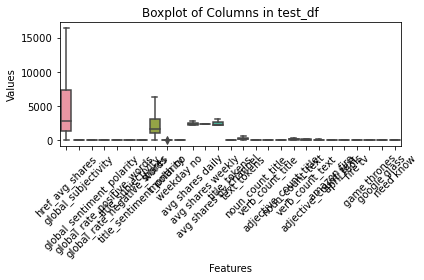

In [ ]:
sns.boxplot(data=test_df_treated.iloc[:, 15:42])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in test_df')


plt.tight_layout()
plt.show()

In [ ]:
#fitting the train data
from sklearn.ensemble import ExtraTreesRegressor
choose = ExtraTreesRegressor()
choose.fit(testA,testb)

ExtraTreesRegressor()

In [ ]:

feature_importances = choose.feature_importances_
feature_names = testA.columns

# Creatinge a DataFrame with feature importances and their corresponding names
sorted_feature_importances = pd.DataFrame({'Feature Importance': feature_importances, 'Feature Names': feature_names})

# Sorting the DataFrame based on feature importances in descending order
sorted_feature_importances = sorted_feature_importances.sort_values(by='Feature Importance', ascending=False)

sorted_feature_importances['Feature Names'].tolist()

['max_avg_key',
 'href_avg_shares',
 'avg shares daily',
 'unique_tokens_rate',
 'avg_avg_key',
 'num_keywords',
 'global_rate_positive_words',
 'min_avg_key',
 'verb_count_title',
 'title_readability',
 'global_sentiment_polarity',
 'average_token_length',
 'global_subjectivity',
 'noun_count_title',
 'global_rate_negative_words',
 'num_hrefs',
 'num_imgs',
 'avg shares by channel',
 'num_videos',
 'title_sentiment_polarity',
 'title_subjectivity',
 'new window',
 'adjective_count_title',
 'title_tokens',
 'weekday no',
 'verb_count_text',
 'adjective_count_text',
 'noun_count_text',
 'text_tokens',
 'text_readability',
 'Channel_Others',
 'is_weekend',
 'Channel_Tech',
 'Channel_Entertainment',
 'Channel_Social Media',
 'Channel_Lifestyle',
 'month no',
 'april 2014opens',
 'social media',
 'see also',
 'new york',
 'fire tv.1',
 'report says',
 '2014opens new',
 'need know',
 'google glass',
 'game thrones',
 'fire tv',
 'april fools',
 'amazon fire',
 'avg shares weekly']

In [ ]:
#selected_cols of train_df
selected_testdf = test_df_treated[selected_cols]
selected_testdf.head(2)

,max_avg_key,href_avg_shares,avg shares daily,unique_tokens_rate,global_rate_positive_words,min_avg_key,avg_avg_key,num_keywords,global_sentiment_polarity,verb_count_title,average_token_length,global_subjectivity,title_readability,global_rate_negative_words,num_videos,noun_count_title,num_hrefs,num_imgs,shares
0,4817.692,1833.333,2441.637795,0.640816,0.036735,1459.5,3370.415,5,0.038762,0.0,4.579592,0.403762,59.97,0.024490,1.0,2,5,3,1600
1,3581.094,8500.000,2233.879630,0.549618,0.044944,0.0,2556.367,7,0.180934,0.0,4.636704,0.410707,80.28,0.003745,0.0,5,4,1,1500


In [ ]:

J = selected_testdf.drop(columns = 'shares')
k = selected_testdf['shares']
from sklearn.model_selection import train_test_split
J_train, J_test, k_train, k_test = train_test_split(J, k, test_size=0.3, random_state=2)

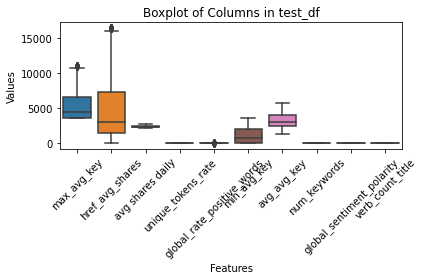

In [ ]:
sns.boxplot(data=J_test.iloc[:, 0:10])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in test_df')


plt.tight_layout()
plt.show()

In [ ]:
def treat_outliers_iqr(num, col):
    q1 = num[col].quantile(0.25)
    q3 = num[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    num[col] = num[col].clip(lower=lower_bound, upper=upper_bound) #clipping every outliers
    return num

#num_df_treated = num_df.copy()

for col in cols2treat:
    J_test = treat_outliers_iqr(J_test, col)

print("\nDistribution (after outlier treatment using IQR method):")
J_test.describe()


Distribution (after outlier treatment using IQR method):


,max_avg_key,href_avg_shares,avg shares daily,unique_tokens_rate,global_rate_positive_words,min_avg_key,avg_avg_key,num_keywords,global_sentiment_polarity,verb_count_title,average_token_length,global_subjectivity,title_readability,global_rate_negative_words,num_videos,noun_count_title,num_hrefs,num_imgs
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,5455.544586,5036.610365,2331.725764,0.535532,0.037471,1049.686669,3268.057818,7.216667,0.105605,1.340000,4.687887,0.455375,61.560283,0.017043,0.556667,3.743333,10.426667,4.433333
std,2249.435920,5052.924916,181.063431,0.106747,0.014026,1187.505875,1109.383785,1.846009,0.094625,0.907641,0.283880,0.092347,24.318938,0.010053,0.833128,1.294750,7.810225,5.244416
min,3568.870000,0.000000,2157.572687,0.272165,0.004347,0.000000,1360.101000,2.000000,-0.114407,0.000000,3.964607,0.233144,0.755000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3610.023250,1448.062500,2233.879630,0.462525,0.029270,0.000000,2481.021250,6.000000,0.047226,1.000000,4.504348,0.401301,48.470000,0.010128,0.000000,3.000000,5.000000,1.000000
50%,4489.414000,3082.250000,2284.658768,0.536733,0.036788,790.250000,3003.295500,7.000000,0.102246,1.000000,4.704894,0.459941,63.360000,0.015926,0.000000,4.000000,8.000000,2.000000
75%,6558.569500,7270.499750,2441.637795,0.608847,0.045885,1988.323000,3987.344000,9.000000,0.163678,2.000000,4.864176,0.513406,80.280000,0.022836,1.000000,5.000000,14.000000,8.000000
max,10981.388875,16004.155625,2753.275044,0.791285,0.070809,3602.060000,5720.423500,10.000000,0.329107,3.500000,5.403917,0.680424,117.160000,0.039680,2.500000,8.000000,27.500000,16.000000


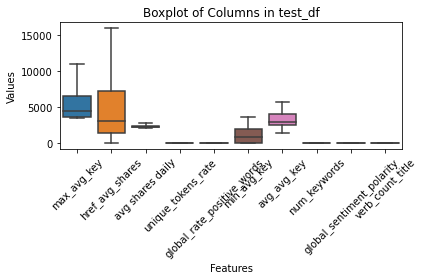

In [ ]:
sns.boxplot(data=J_test.iloc[:, 0:10])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in test_df')


plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler


scaler_J = MinMaxScaler()
scaler_k = MinMaxScaler()


J_train = scaler_J.fit_transform(J_train)
k_train = scaler_k.fit_transform(k_train.values.reshape(-1, 1))


J_test = scaler_J.transform(J_test)
k_test = scaler_k.transform(k_test.values.reshape(-1, 1))


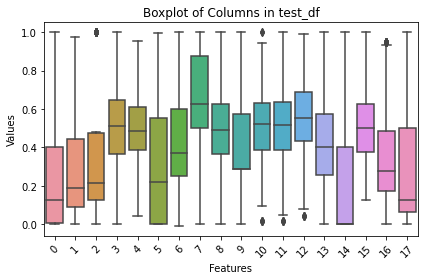

In [ ]:
sns.boxplot(data=J_test)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Columns in test_df')


plt.tight_layout()
plt.show()

## 5.2 Random Forest Regressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rf_regressor.score(X_train, y_train)

0.8644129265423223

In [ ]:
rf_regressor.score(J_test,k_test)

0.6383239483916887

In [ ]:
y_pred_rf = rf_regressor.predict(J_test)

In [ ]:
from sklearn.metrics import r2_score
#scoring
r2 = r2_score(k_test, y_pred_rf)
print(f'R2 score: {r2}')

R2 score: 0.6383239483916887


In [ ]:
import pickle

with open('new_news_share.pkl', 'wb') as file:
    pickle.dump(rf_regressor, file)

In [ ]:
model77= open('new_news_share.pkl', 'rb')
newsgive = pickle.load(model77)

In [ ]:
## pickling

import pickle

with open('model/new_news_share.pkl', 'wb') as file:
    pickle.dump(rf_regressor, file)

In [ ]:
model77= open('model/new_news_share.pkl', 'rb')
newsgive = pickle.load(model77)

predictedmodel = newsgive.predict(J_test)

metrics.r2_score(k_test, predictedmodel)

0.6383239483916887